In [59]:
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
fhsd1 = pd.read_csv('cvd-dataset.csv')
fhsd1.head(50)

#Importing Framingham Heart Study Dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
fhsd1.dropna(inplace=True)



#Getting rid of all the NaNs and NAs

In [5]:
fhsd1.reset_index(inplace=True, drop=True)

In [6]:
fhsd1.isnull().sum()

#Checking for any non-number values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
fhsd1.rename(columns = {'male': 'sex'}, inplace=True)

In [28]:
fhsd1

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [30]:
hdf_features = fhsd1[['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
fhsd1.rename(columns = {'TenYearCHD': 'TenYearCVD'}, inplace=True)
hdf_target = fhsd1[['TenYearCVD']]

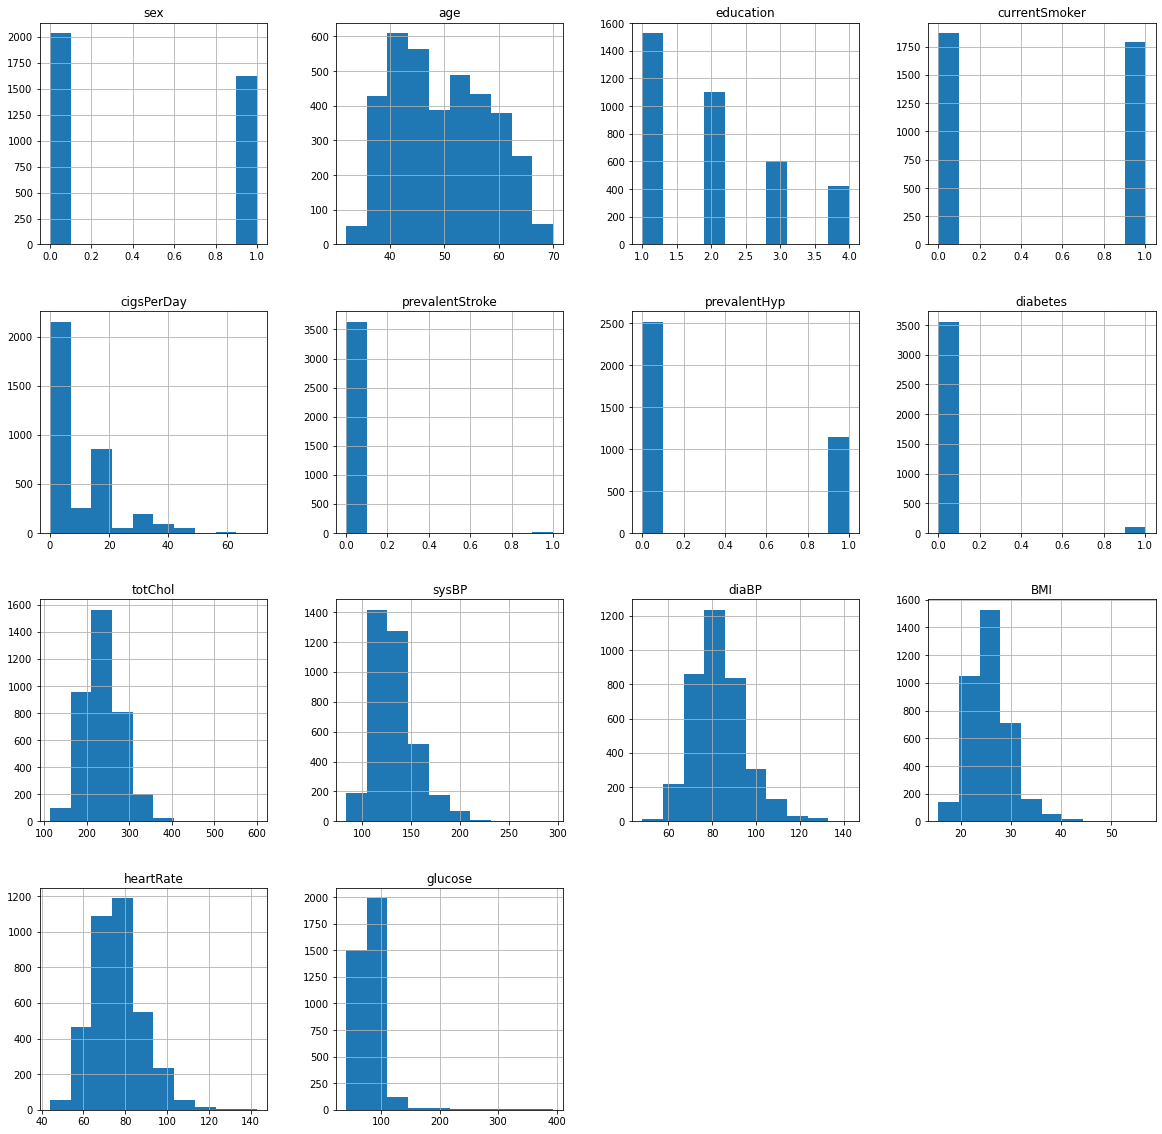

In [31]:
import matplotlib.pyplot as plt

hdf_features.hist(figsize = (20, 20))
plt.show()

#Creating histograms for the dataset

In [32]:
features = hdf_features.columns

In [33]:
features = features.to_list()

In [34]:
features

['sex',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [35]:
from sklearn.model_selection import train_test_split
X = hdf_features
Y = hdf_target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 100)

In [36]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
Y_train.reset_index(inplace=True, drop=True)
Y_test.reset_index(inplace=True, drop=True)

In [37]:
X_train

,sex,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,50,1.0,0,0.0,0,0,0,227.0,114.0,87.0,33.10,92.0,120.0
1,1,46,3.0,0,0.0,0,1,0,256.0,138.0,105.0,26.97,98.0,100.0
2,1,61,1.0,1,20.0,0,1,0,183.0,156.0,92.0,24.69,75.0,79.0
3,1,44,3.0,1,30.0,0,0,0,363.0,140.0,87.0,26.44,95.0,79.0
4,1,67,1.0,1,15.0,0,1,0,204.0,185.0,100.0,22.69,75.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,1,56,1.0,1,20.0,0,1,0,197.0,140.0,86.0,25.16,90.0,71.0
3286,1,53,1.0,1,20.0,0,0,0,188.0,138.0,89.0,18.23,60.0,75.0
3287,1,49,1.0,1,20.0,0,0,0,247.0,150.0,88.0,27.92,75.0,74.0
3288,0,41,1.0,0,0.0,0,0,0,225.0,110.0,60.0,25.54,75.0,58.0


In [38]:
Y_train

,TenYearCVD
0,0
1,0
2,0
3,0
4,1
...,...
3285,0
3286,0
3287,1
3288,0


In [39]:
Y_test

,TenYearCVD
0,0
1,0
2,0
3,0
4,0
...,...
361,0
362,0
363,0
364,1


In [42]:
X_test

,sex,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,49,1.0,0,0.0,0,0,1,248.0,130.5,82.0,27.29,52.0,254.0
1,0,46,3.0,1,10.0,0,0,0,269.0,134.0,78.0,26.80,105.0,104.0
2,0,41,2.0,0,0.0,0,0,0,235.0,143.5,90.0,26.22,70.0,83.0
3,0,40,2.0,1,9.0,0,0,0,193.0,105.0,60.0,22.54,75.0,85.0
4,0,50,2.0,0,0.0,0,0,0,240.0,107.5,70.0,26.76,67.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,42,2.0,1,15.0,0,0,0,177.0,112.5,70.0,20.62,86.0,83.0
362,0,50,1.0,0,0.0,0,1,0,212.0,169.0,117.0,27.08,100.0,68.0
363,1,45,1.0,1,20.0,0,0,0,246.0,111.0,72.0,21.79,75.0,118.0
364,1,49,3.0,1,40.0,0,1,0,260.0,142.0,54.0,25.40,67.0,95.0


In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Users\manan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\manan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [50]:
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, Y_train)

C:\Users\manan\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [61]:
svc_model = LinearSVC()
svc_model.fit(X_train, Y_train)

C:\Users\manan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\manan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [51]:
from sklearn.metrics import accuracy_score
predictions = log_reg.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8469945355191257


In [62]:
predictions_2 = kn_model.predict(X_test)
print(accuracy_score(Y_test, predictions_2))

0.8469945355191257


In [63]:
predictions_3 = svc_model.predict(X_test)
print(accuracy_score(Y_test, predictions_3))

0.8442622950819673


In [56]:
with open('cvd_log_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [57]:
with open('cvd_kn_model.pkl', 'wb') as f:
    pickle.dump(kn_model, f)

In [65]:
with open('cvd_svc_model.pkl', 'wb') as f:
    pickle.dump(svc_model, f)